# Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing the Datasets

In [4]:
train_data=pd.read_csv("titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data_org=test_data=pd.read_csv("titanic_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.shape

(418, 11)

# percentage of Women and Men

In [8]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("Total women: ",len(women))

print("% of women who survived:", rate_women*100)

Total women:  314
% of women who survived: 74.20382165605095


In [9]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("Total men: ",len(men))

print("% of men who survived:", rate_men*100)

Total men:  577
% of men who survived: 18.890814558058924


# Describing Data

In [10]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [12]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [13]:
print(test_data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


# Relations between dependent variable and independent variables

In [14]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'Males and Females who survived'}, xlabel='Sex', ylabel='Survived'>

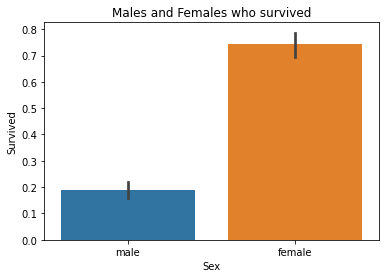

In [15]:
plt.title("Males and Females who survived")
sns.barplot(x=train_data['Sex'],
             y=train_data['Survived'])

C:\Users\disha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Age of people who survived or did not survive'}, xlabel='Survived', ylabel='Age'>

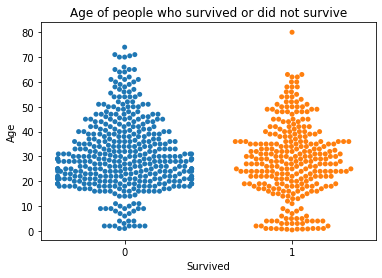

In [16]:
plt.title("Age of people who survived or did not survive")
sns.swarmplot(x=train_data['Survived'], y=train_data['Age'])

C:\Users\disha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\disha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':"People's Fare who survived or did not survive"}, xlabel='Survived', ylabel='Fare'>

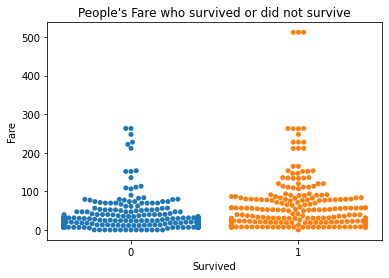

In [17]:
plt.title("People's Fare who survived or did not survive")
sns.swarmplot(x=train_data['Survived'], y=train_data['Fare'])

<AxesSubplot:title={'center':'Survived and not survived people with their Fare and Age'}, xlabel='Age', ylabel='Fare'>

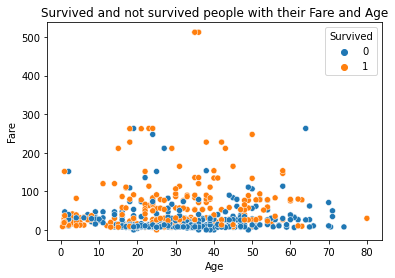

In [18]:
plt.title("Survived and not survived people with their Fare and Age")
sns.scatterplot(x=train_data['Age'], y=train_data['Fare'], hue=train_data['Survived'])

# Taking Ground Truth from Train Data

In [19]:
y=train_data['Survived'].values
y.shape

(891,)

# Merging Train Data and Test Data

In [20]:
train_data=train_data.drop(['Survived'], axis=1)
concated_data=pd.concat([train_data,test_data],ignore_index=True)
print(concated_data)

      PassengerId  Pclass                                               Name  \
0               1       3                            Braund, Mr. Owen Harris   
1               2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2               3       3                             Heikkinen, Miss. Laina   
3               4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4               5       3                           Allen, Mr. William Henry   
...           ...     ...                                                ...   
1304         1305       3                                 Spector, Mr. Woolf   
1305         1306       1                       Oliva y Ocana, Dona. Fermina   
1306         1307       3                       Saether, Mr. Simon Sivertsen   
1307         1308       3                                Ware, Mr. Frederick   
1308         1309       3                           Peter, Master. Michael J   

         Sex   Age  SibSp  Parch       

In [21]:
concated_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engineering

In [22]:
concated_data['Relatives'] = concated_data['SibSp'] + concated_data['Parch']
concated_data.loc[concated_data['Relatives'] > 0, 'Alone'] = 0
concated_data.loc[concated_data['Relatives'] == 0, 'Alone'] = 1

# Checking Nan values

In [23]:
concated_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Relatives', 'Alone'],
      dtype='object')

In [24]:
for col in concated_data.columns.tolist():          
    print('{} column missing values: {}'.format(col, concated_data[col].isnull().sum()))

PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 263
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 1014
Embarked column missing values: 2
Relatives column missing values: 0
Alone column missing values: 0


In [25]:
concated_data[concated_data['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,1.0
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,1.0


# Now fix these values:

In [26]:
concated_data['Embarked'] = concated_data['Embarked'].fillna('S')
print("row 61: ",concated_data.iloc[61,10])
print("row 829: ",concated_data.iloc[829,10])

row 61:  S
row 829:  S


# Feature Selection

In [27]:
X=concated_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Relatives']].values
print(X[0:5,:])

[[3 'male' 22.0 1 0 7.25 'S' 1]
 [1 'female' 38.0 1 0 71.2833 'C' 1]
 [3 'female' 26.0 0 0 7.925 'S' 0]
 [1 'female' 35.0 1 0 53.1 'S' 1]
 [3 'male' 35.0 0 0 8.05 'S' 0]]


# Taking care of missing data

In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:,2].reshape(-1,1))
X[:,2]=(imputer.transform(X[:,2].reshape(-1,1))).reshape(-1,)

imputer.fit(X[:,5].reshape(-1,1))
X[:,5]=(imputer.transform(X[:,5].reshape(-1,1))).reshape(-1,)

print(X[:6])

[[3 'male' 22.0 1 0 7.25 'S' 1]
 [1 'female' 38.0 1 0 71.2833 'C' 1]
 [3 'female' 26.0 0 0 7.925 'S' 0]
 [1 'female' 35.0 1 0 53.1 'S' 1]
 [3 'male' 35.0 0 0 8.05 'S' 0]
 [3 'male' 29.881137667304014 0 0 8.4583 'Q' 0]]


# Encoding Categorical Data

In [29]:
set(X[:,0])

{1, 2, 3}

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[6])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

print(X[:6,:])

[[0.0 0.0 1.0 3 'male' 22.0 1 0 7.25 1]
 [1.0 0.0 0.0 1 'female' 38.0 1 0 71.2833 1]
 [0.0 0.0 1.0 3 'female' 26.0 0 0 7.925 0]
 [0.0 0.0 1.0 1 'female' 35.0 1 0 53.1 1]
 [0.0 0.0 1.0 3 'male' 35.0 0 0 8.05 0]
 [0.0 1.0 0.0 3 'male' 29.881137667304014 0 0 8.4583 0]]


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,4]=le.fit_transform(X[:,4])
print(X[:6,:])
print("")

[[0.0 0.0 1.0 3 1 22.0 1 0 7.25 1]
 [1.0 0.0 0.0 1 0 38.0 1 0 71.2833 1]
 [0.0 0.0 1.0 3 0 26.0 0 0 7.925 0]
 [0.0 0.0 1.0 1 0 35.0 1 0 53.1 1]
 [0.0 0.0 1.0 3 1 35.0 0 0 8.05 0]
 [0.0 1.0 0.0 3 1 29.881137667304014 0 0 8.4583 0]]



# Getting back Train data and Test data

In [32]:
test_data=X[891:]
X=X[:891]
print(X.shape,test_data.shape)

(891, 10) (418, 10)


In [33]:
print(test_data[:6])

[[0.0 1.0 0.0 3 1 34.5 0 0 7.8292 0]
 [0.0 0.0 1.0 3 0 47.0 1 0 7.0 1]
 [0.0 1.0 0.0 2 1 62.0 0 0 9.6875 0]
 [0.0 0.0 1.0 3 1 27.0 0 0 8.6625 0]
 [0.0 0.0 1.0 3 0 22.0 1 1 12.2875 2]
 [0.0 0.0 1.0 3 1 14.0 0 0 9.225 0]]


# Splitting the Data

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [35]:
print(x_train[:6])

[[0.0 0.0 1.0 1 1 42.0 1 0 52.0 1]
 [0.0 1.0 0.0 3 1 29.881137667304014 1 0 15.5 1]
 [1.0 0.0 0.0 1 1 49.0 1 0 89.1042 1]
 [1.0 0.0 0.0 1 0 19.0 1 0 91.0792 1]
 [0.0 0.0 1.0 1 1 19.0 1 0 53.1 1]
 [0.0 0.0 1.0 2 0 27.0 1 0 21.0 1]]


In [36]:
print(x_test[:6])

[[0.0 0.0 1.0 1 0 48.0 0 0 25.9292 0]
 [0.0 0.0 1.0 3 1 29.881137667304014 0 0 7.8958 0]
 [0.0 0.0 1.0 2 0 17.0 0 0 10.5 0]
 [0.0 1.0 0.0 3 0 29.881137667304014 0 0 8.1375 0]
 [0.0 0.0 1.0 2 0 7.0 0 2 26.25 2]
 [0.0 0.0 1.0 3 1 21.0 0 0 7.8542 0]]


In [37]:
print(y_train[:6])

[0 0 1 1 0 0]


In [38]:
print(y_test[:6])

[1 0 1 0 1 0]


In [39]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(668, 10) (223, 10) (668,) (223,)


# Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,3:]=sc.fit_transform(x_train[:,3:])
x_test[:,3:]=sc.transform(x_test[:,3:])
test_data[:,3:]=sc.transform(test_data[:,3:])

In [41]:
print(x_train[:6])

[[0.0 0.0 1.0 -1.5932633446827085 0.7318689663512504 0.9040165883511864
  0.49236868939066036 -0.4868644955601508 0.44426438339827423
  0.07784755093219665]
 [0.0 1.0 0.0 0.8173819877024538 0.7318689663512504 -0.011651581396073035
  0.49236868939066036 -0.4868644955601508 -0.3495136383493248
  0.07784755093219665]
 [1.0 0.0 0.0 -1.5932633446827085 0.7318689663512504 1.4329174878141566
  0.49236868939066036 -0.4868644955601508 1.2511821498236788
  0.07784755093219665]
 [1.0 0.0 0.0 -1.5932633446827085 -1.3663648084240088 -0.8338006527414299
  0.49236868939066036 -0.4868644955601508 1.2941331523702955
  0.07784755093219665]
 [0.0 0.0 1.0 -1.5932633446827085 0.7318689663512504 -0.8338006527414299
  0.49236868939066036 -0.4868644955601508 0.46818646076601017
  0.07784755093219665]
 [0.0 0.0 1.0 -0.3879406784901273 -1.3663648084240088
  -0.22934248192660683 0.49236868939066036 -0.4868644955601508
  -0.2299032515106455 0.07784755093219665]]


In [42]:
print(x_test[:6])

[[0.0 0.0 1.0 -1.5932633446827085 -1.3663648084240088 1.3573602164623038
  -0.48942917482713405 -0.4868644955601508 -0.12270624809151491
  -0.5804076898615677]
 [0.0 0.0 1.0 0.8173819877024538 0.7318689663512504 -0.011651581396073035
  -0.48942917482713405 -0.4868644955601508 -0.5148847844581766
  -0.5804076898615677]
 [0.0 0.0 1.0 -0.3879406784901273 -1.3663648084240088 -0.9849151954451356
  -0.48942917482713405 -0.4868644955601508 -0.4582503536572151
  -0.5804076898615677]
 [0.0 1.0 0.0 0.8173819877024538 -1.3663648084240088
  -0.011651581396073035 -0.48942917482713405 -0.4868644955601508
  -0.5096284516401932 -0.5804076898615677]
 [0.0 0.0 1.0 -0.3879406784901273 -1.3663648084240088 -1.7404879089636645
  -0.48942917482713405 2.053959590644386 -0.1157297004373607
  0.736102791725961]
 [0.0 0.0 1.0 0.8173819877024538 0.7318689663512504 -0.6826861100377242
  -0.48942917482713405 -0.4868644955601508 -0.5157894739295383
  -0.5804076898615677]]


# Confusion Matrix

In [43]:
best_Acc={
    
    }
def Confusion_Matrix(y_pred,name):
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("")
    print("Sum of Wrong predictions",cm[0,1]+cm[1,0])
    print("Accuracy of the model: ",accuracy_score(y_test,y_pred))
    print("Precision: ",cm[1,1]/(cm[1,1]+cm[0,1]))
    print("Recall: ",cm[1,1]/(cm[1,1]+cm[1,0]))
    best_Acc[name]=accuracy_score(y_test,y_pred)
    

# Checking the Overfitting

In [44]:
def check_Overfitting(yhat_test,model):
    yhat_train=model.predict(x_train)
    return accuracy_score(y_train,yhat_train),accuracy_score(y_test,yhat_test)

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

classifier.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred=classifier.predict(x_test)
Overfitting={
    "train_Log,test_log":check_Overfitting(y_pred,classifier)
}
y_pred_TD_LogR=classifier.predict(test_data)

In [47]:
Overfitting

{'train_Log,test_log': (0.8083832335329342, 0.7937219730941704)}

In [48]:
print((np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))[:20])

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


In [49]:
Confusion_Matrix(y_pred,"Logistic Regression")

[[111  17]
 [ 29  66]]

Sum of Wrong predictions 46
Accuracy of the model:  0.7937219730941704
Precision:  0.7951807228915663
Recall:  0.6947368421052632


In [50]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\disha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


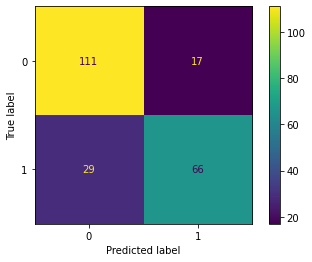

In [51]:
plot_confusion_matrix(classifier,x_test,y_test)

In [52]:
test_data

array([[0.0, 1.0, 0.0, ..., -0.4868644955601508, -0.5163331575060778,
        -0.5804076898615677],
       [0.0, 0.0, 1.0, ..., -0.4868644955601508, -0.5343660543727383,
        0.07784755093219665],
       [0.0, 1.0, 0.0, ..., -0.4868644955601508, -0.4759200698947473,
        -0.5804076898615677],
       ...,
       [0.0, 0.0, 1.0, ..., -0.4868644955601508, -0.5289292186073438,
        -0.5804076898615677],
       [0.0, 0.0, 1.0, ..., -0.4868644955601508, -0.5115313441580813,
        -0.5804076898615677],
       [1.0, 0.0, 0.0, ..., 0.7835475475421176, -0.20036383543010403,
        0.736102791725961]], dtype=object)

In [53]:
Y_predictions=classifier.predict(test_data)
Y_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
raw_test_data=pd.read_csv('titanic_test.csv')

In [55]:
raw_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
raw_test_data['Survived_predictions']=Y_predictions

In [57]:
raw_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_predictions
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [58]:
raw_test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_predictions
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0
